In [1]:
import fastai
from fastai import *
from fastai.vision import *

In [2]:
print(fastai.__version__)

1.0.39.dev0


In [3]:
url = URLs.PETS
url

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet'

In [4]:
dest = pathlib.Path("F:\\data\\fastai\\oxford-iiit-pet")
dest

WindowsPath('F:/data/fastai/oxford-iiit-pet')

In [5]:
fname = pathlib.Path("F:\\data\\fastai\\oxford-iiit-pet.tgz")
fname

WindowsPath('F:/data/fastai/oxford-iiit-pet.tgz')

In [6]:
path = untar_data(url,dest=dest,fname=fname)
path

WindowsPath('F:/data/fastai/oxford-iiit-pet')

In [7]:
path.ls()

[WindowsPath('F:/data/fastai/oxford-iiit-pet/annotations'),
 WindowsPath('F:/data/fastai/oxford-iiit-pet/images')]

In [8]:
path_anno = path/'annotations'
path_img = path/'images'
path_img

WindowsPath('F:/data/fastai/oxford-iiit-pet/images')

In [9]:
fnams = get_image_files(path_img)
fnams[:5]

[WindowsPath('F:/data/fastai/oxford-iiit-pet/images/Abyssinian_1.jpg'),
 WindowsPath('F:/data/fastai/oxford-iiit-pet/images/Abyssinian_10.jpg'),
 WindowsPath('F:/data/fastai/oxford-iiit-pet/images/Abyssinian_100.jpg'),
 WindowsPath('F:/data/fastai/oxford-iiit-pet/images/Abyssinian_101.jpg'),
 WindowsPath('F:/data/fastai/oxford-iiit-pet/images/Abyssinian_102.jpg')]

In [10]:
np.random.seed(2)
pat = re.compile(r'images\\([^/]+)_\d+.jpg$')

In [11]:
a = pat.search(str(fnams[1]))
a

<_sre.SRE_Match object; span=(31, 55), match='images\\Abyssinian_10.jpg'>

In [12]:
bs = 64

In [13]:
data = ImageDataBunch.from_name_re(path_img, fnams, pat, ds_tfms=get_transforms(), size=224, bs=bs
                      ,num_workers=0).normalize(imagenet_stats)

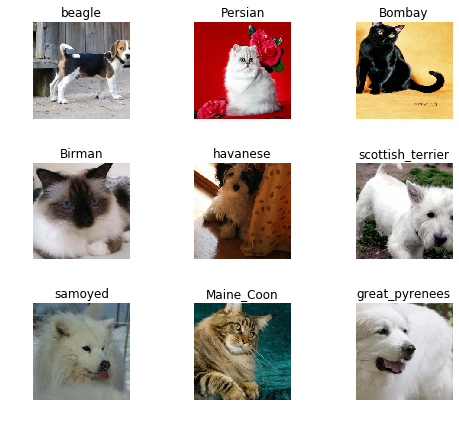

In [14]:
data.show_batch(rows=3, figsize=(7,6))

In [15]:
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

In [16]:
len(data.classes)

37

In [17]:
learner = create_cnn(data,models.resnet18,metrics = accuracy)

In [18]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


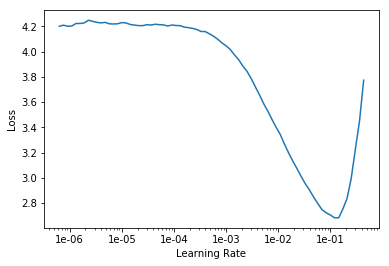

In [19]:
learner.recorder.plot()

In [20]:
lr = 2e-2
lr

0.02

In [21]:
learner.fit_one_cycle(2,lr)

In [22]:
learner.save('state-1')

In [23]:
interper =  ClassificationInterpretation.from_learner(learner)

In [24]:
top_loss,idx =  interper.top_losses()

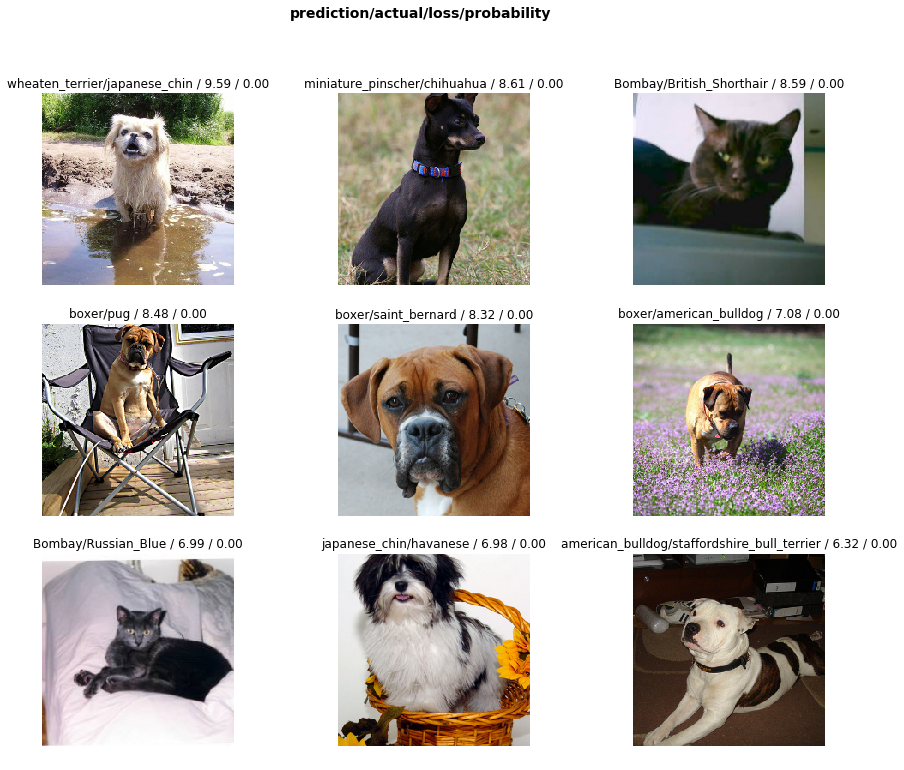

In [27]:
interper.plot_top_losses(9,figsize=(15,12))

In [29]:
doc(interper.top_losses)

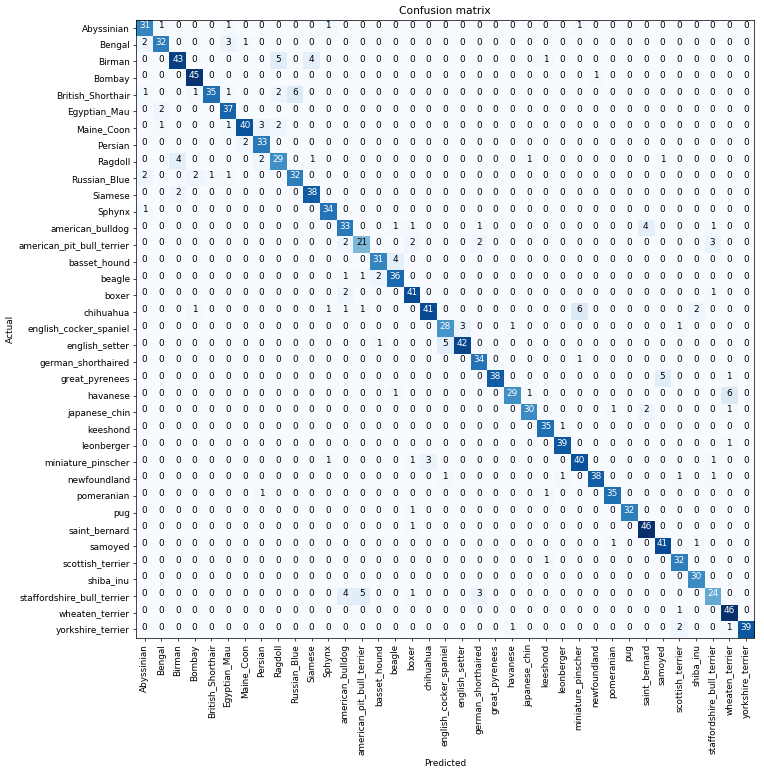

In [31]:
interper.plot_confusion_matrix(figsize=(12,12),dpi=64)

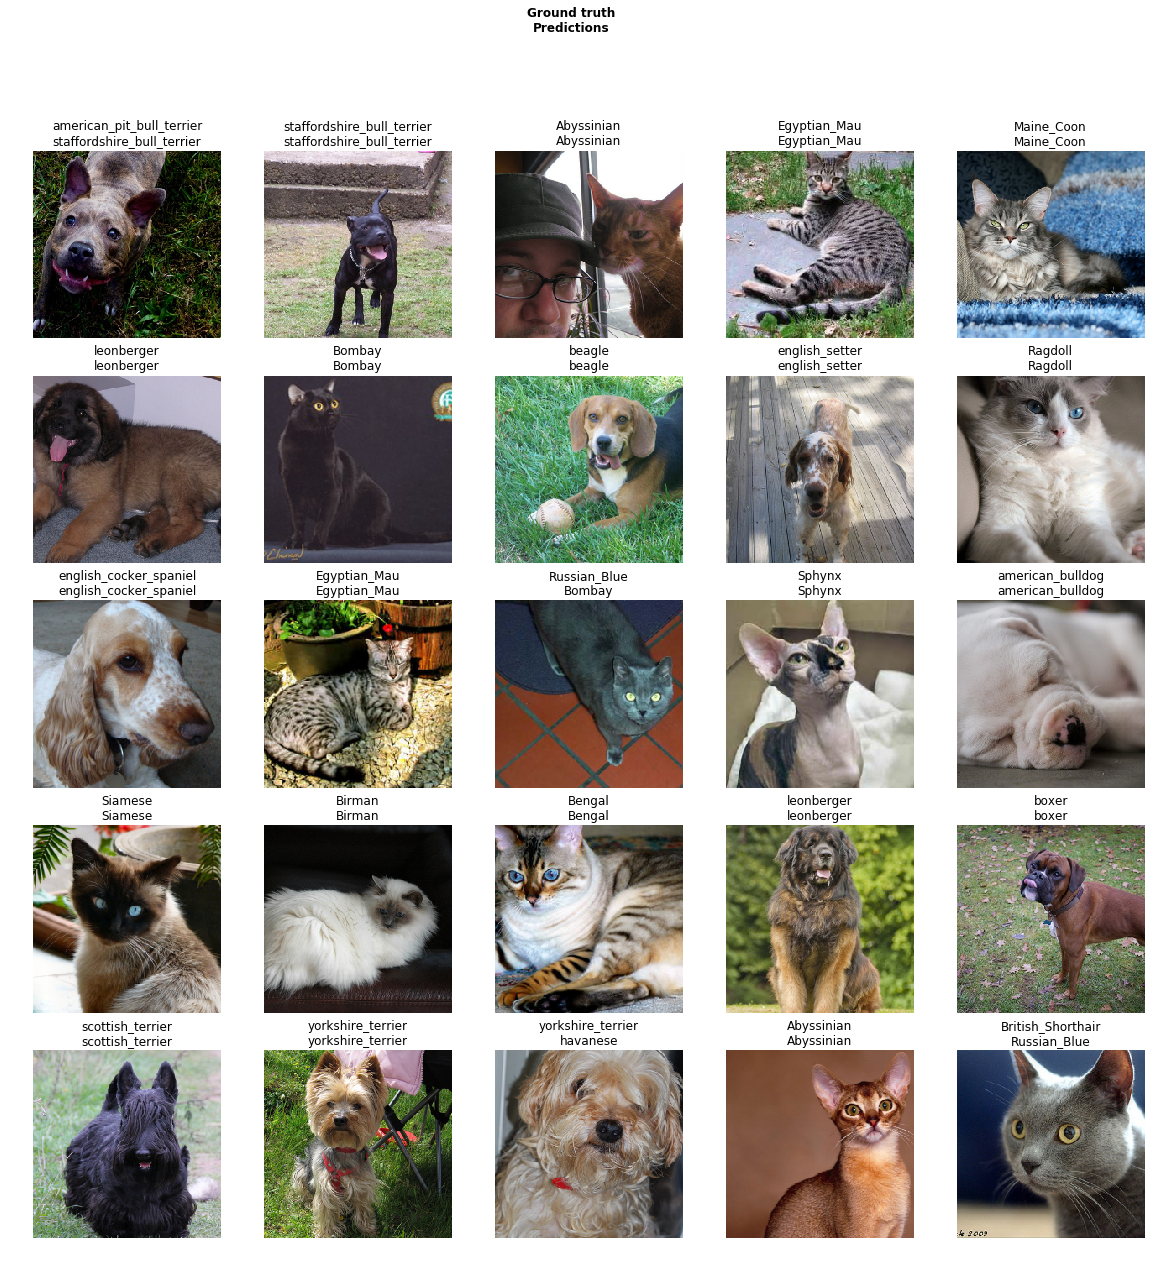

In [33]:
learner.show_results()

In [34]:
lr = slice(lr/20,lr/2)
lr

slice(0.001, 0.01, None)

In [35]:
last_metrics = learner.validate()

In [36]:
last_metrics

[0.39385268, tensor(0.8863)]